# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

C:\Users\monla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
from sklearn.metrics import r2_score
#for the testing set
score = r2_score(y_test, y_pred_test)
score

0.7014144207170151

In [16]:
#for the training set
score_training=r2_score(y_train, y_pred_train)
score_training

0.7508168657008915

## 4. Calculate and print mean squared error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_squared_error

score_test = mean_squared_error(y_test, y_pred_test)
score_test

27.82199420007601

In [19]:
score_train = mean_squared_error(y_train, y_pred_train)
score_train

20.48304814195577

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [20]:
from sklearn.metrics import mean_absolute_error

mae_score_train = mean_absolute_error(y_train, y_pred_train)
mae_score_train

3.1736413370635015

In [21]:
mae_score_test = mean_absolute_error(y_test, y_pred_test)
mae_score_test

3.6723694680822363

## Classification Model Evaluation

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_predtest=logreg.predict(X_test)
y_predtrain=logreg.predict(X_train)

C:\Users\monla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score

a_score_train = accuracy_score(y_train, y_predtrain)
a_score_train

0.975

In [30]:
a_score_test = accuracy_score(y_test, y_predtest)
a_score_test

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [31]:
from sklearn.metrics import balanced_accuracy_score

bas_score_train = balanced_accuracy_score(y_train, y_predtrain)
bas_score_train

0.9724556489262373

In [32]:
bas_score_test = balanced_accuracy_score(y_test, y_predtest)
bas_score_test

0.9375

## 10. Calculate and print the precision score for both the training and the testing set.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_train = precision_score(y_train, y_predtrain, average= 'weighted')
precision_train

0.9751350716466995

In [36]:
precision_test = precision_score(y_test, y_predtest, average= 'weighted')
precision_test

0.9333333333333333

## 11. Calculate and print the recall score for both the training and the testing set.

In [38]:
recall_train = recall_score(y_train, y_predtrain, average= 'weighted')
recall_train

0.975

In [40]:
recall_test = recall_score(y_test, y_predtest, average= 'weighted')
recall_test

0.9333333333333333

## 12. Calculate and print the F1 score for both the training and the testing set.

In [41]:
f1_score_train = f1_score(y_train, y_predtrain, average= 'weighted')
f1_score_train

0.9749604916593503

In [42]:
f1_score_test= f1_score(y_test, y_predtest, average= 'weighted')
f1_score_test

0.9333333333333333

## 13. Generate confusion matrices for both the training and the testing set.

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[[44  0  0]
 [ 0 41  1]
 [ 0  2 32]]


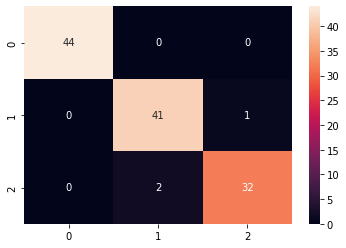

In [47]:
conf_m_train=confusion_matrix(y_train, y_predtrain)
print (conf_m_train)
sns.heatmap(conf_m_train, annot=True)
plt.show();

[[ 6  0  0]
 [ 0  7  1]
 [ 0  1 15]]


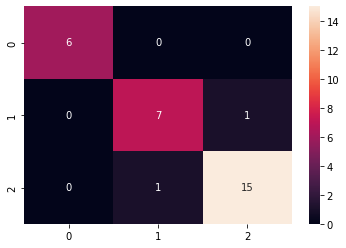

In [48]:
conf_m_test=confusion_matrix(y_test, y_predtest)
print (conf_m_test)
sns.heatmap(conf_m_test, annot=True)
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.